In [1]:
# https://www.mldawn.com/binary-classification-from-scratch-using-numpy/

# Import numpy for all mathematical operations and also generating our synthetic data
import numpy as np
# Matplotlib is going to be used for visualisations
import matplotlib.pyplot as plt

In [2]:
def Cross_Entropy(y_hat, y):
    # Note that y could be either 1 or 0. If y=1, only the first term in the Error survives! And if y=0, only the second term survives!
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
 
def sigmoid(z):
      return 1 / (1 + np.exp(-z))

In [3]:
def derivative_Cross_Entropy(y_hat, y):
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)
 
def derivative_sigmoid(x):
    return x*(1-x)

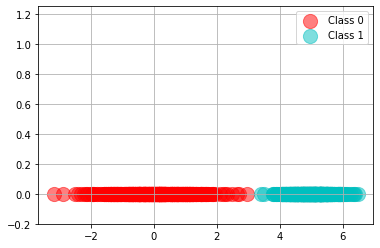

In [4]:
# Define some artificial data
area = 200
# The number of samples for each of our 2 classes
N = 500
# The reference mean and standard deviation for generating 500 samples for one of the classes
mu, sigma = 0, 1
# Here we sample 500 samples from our first Gaussian for class 0
x_0 = np.random.normal(mu, sigma, N)
# Here we sample 500 samples from our first Gaussian for class 1. Note how we are tweaking the 
# means and standard deviation with respect to the first Gaussian
x_1 = np.random.normal(mu + 5, sigma*0.50, N)
# A scatter plot for plotting samples of both classes with area = 200. The y value for all the points is 0 (i.e., they are 1-Dimensional datapoints)
plt.scatter(x_0, np.zeros_like(x_0), s=area, c='r', alpha=0.5, label="Class 0")
plt.scatter(x_1, np.zeros_like(x_1), s=area, c='c', alpha=0.5, label="Class 1")
# This line makes the labels of the plot, actually appear as legends on the plot
plt.legend()
# Let's put some limit on the vertical axis (Remember that our data points have NO second dimension) So, 
plt.ylim(-0.2, 1.25)
# Put some grid on the plot
plt.grid()
# Show the bloody plot ;-)
plt.show()

In [6]:
#Define X, Y as data and labels. Now X has 1000 values. X is now a list
X = [x_0, x_1]
# Create the ground truth numpy array. np.zeros_like(x_0) generates a numpy array full of 
# zeros with the same dimensions of x_0 now Y has 1000 elements inside of it
Y = [np.zeros_like(x_0), np.ones_like(x_1)]
# Both X and Y are now lists and NOT numpy arrays. Let's convert them
X = np.array(X)
Y = np.array(Y)
# Now the dimensions of both X and Y is (2, 500). Let's make it 1000 (i.e., flattening)
X = X.reshape(X.shape[0]*X.shape[1])
Y = Y.reshape(Y.shape[0]*Y.shape[1])

In [7]:
# We need one random scalar value for W and one for W_0 # We sample from a 
# uniform distribution between 2 small values around 0, that is the range: [-0.01, 0.01]
W = np.random.uniform(low=-0.01, high=0.01, size=(1,))
W_0 = np.random.uniform(low=-0.01, high=0.01, size=(1,))

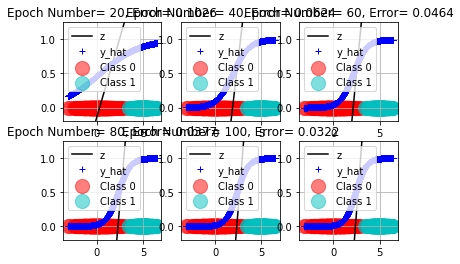

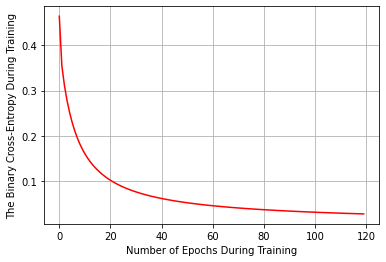

In [9]:
# The number of epochs. This is typical of ANNs to go through the training set many many times
# In the beginning of every epoch (i.e., a total sweep through the training set) we usuallu shuffle the data
Epoch = 120
# The learning rate! If it is too big, we will jump of the global minimum and might never converge
# If it is too small, it might take forever to converge. Needs fine-tuning for every application!
eta = 0.001
# This is simply tracking the index of ever sub-plot in the main plot, and will increment as we plot more sub-plots during training
subplot_counter = 1
# This list will hold the average cross-entropy error, per epoch. We would like to see it going down!
E = []
# This loop counts the epochs
for ep in range(Epoch):
    # Shuffle the train_data X and its Labels Y. The random_index holds the shuffled indices
    random_index = np.arange(X.shape[0])
    np.random.shuffle(random_index)
    # e will keep track of the cross-entropy in a given epoch for every training data. Then e will be averaged and become an entry in the list E
    e = []
    # Let's go through the random indecis and grab the corresponding X and Y value as for our data and its ground truth (i.e., 0 or 1)
    for i in random_index:
        # This is where we compute the Z that is the linear combination of the current data X[i] and the bias weight
        Z = W*X[i] + W_0
        # Here the sigmoid function is applied on Z to compute the output of the network
        Y_hat = sigmoid(Z)
        # Compute the Cross Entropy Error and add the error to the list e[]. We call the Cross Entropy Error
        e.append(Cross_Entropy(Y_hat, Y[i]))
        # Compute the gradients using the chain-rule and backpropagation. 
        # We call the derivative_Cross_Entropy() and derivative_sigmoid() functions. 
        # The first is the derivative of Error w.r.t. y_hat(i.e., the output), and the 
        # latter is the derivative of y_hat w.r.t z (i.e., the inout to the sigmoid() function)
        # dEdW is the gradient of Error w.r.t W and dEdW_0 is the gradient of Error w.r.t. W_0
        dEdW = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)*X[i]
        dEdW_0 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)
        # Update the parameters using the famous perceptron rule used in backpropagation and gradient descent
        W = W - eta*dEdW
        W_0 = W_0 - eta*dEdW_0
    # Every 20 times show us how well the line, z, and the sigmoid, y_hat, are doing in separating the samples in class 1 and 0
    if ep % 20 == 0:
        # Plot the training data every time in each subplot and show us the average error at the corresponding epoch
        plt.title("Epoch Number= %d" % ep + ", Error= %.4f" % np.mean(e))
        plt.subplot(2, 3, subplot_counter)
        plt.scatter(x_0, np.zeros_like(x_0), s=area, c='r', alpha=0.5, label="Class 0")
        plt.scatter(x_1, np.zeros_like(x_1), s=area, c='c', alpha=0.5, label="Class 1")
        # In order to have a nice and continuous line, z, we need to get the minimum and maximum of our training data
        minimum = np.min(X)
        maximum = np.max(X)
        # Break all the values between minimum and maximum in steps of 0.01. This gives us enough values to actually plot both z and y_hat
        s = np.arange(minimum, maximum, 0.01)
        # Plot the line, z
        plt.plot(s, W * s + W_0, '-k', label="z")
        # Plot the sigmoid, y_hat
        plt.plot(s, sigmoid(W * s + W_0), '+b', label="y_hat")
        plt.legend()
        plt.ylim(-0.2, 1.25)
        plt.grid()
        # Make sure you increment the subplot index
        subplot_counter += 1
    # Before going to the next epoch, add the average error for the last epoch to E
    E.append(np.mean(e))
# Create a new figure
plt.figure()
# Plot E, that is the average binary cross Entropy error per epoch
plt.plot(E, c='r')
plt.xlabel("Number of Epochs During Training")
plt.ylabel("The Binary Cross-Entropy During Training")
plt.grid()
plt.show()